In [ ]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt

### Linear Regression

Text(0.5, 1.0, 'Original Data')

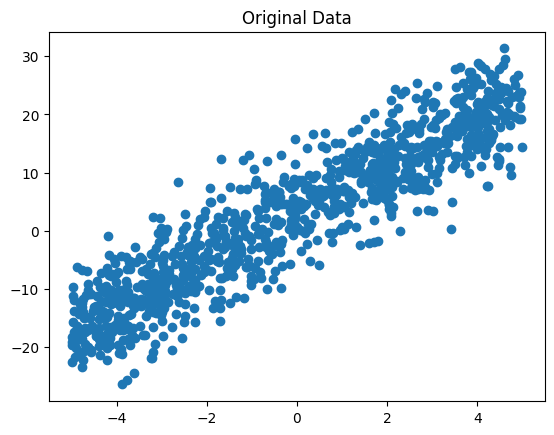

In [ ]:
# Generate Random Data
n = 1000
X = 10* np.random.random(n) - 5 # X in range (-5, 5)
Y = 4*X + 3 + np.random.normal(loc = 0, scale = 5, size = n) #Y is generated from the equation: Y = 4X + 3 + noise where noise is Gaussian with mean 0 and std deviation 5.

plt.figure()
plt.scatter(X,Y)
plt.title("Original Data")


Gradient Descent Estimates:
a = 3.9985, b = 3.1431


Text(0.5, 1.0, 'Linear Fit Using Gradient Descent')

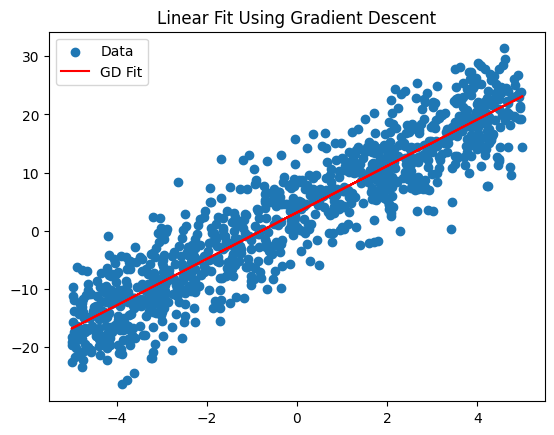

In [ ]:
def Y_based_on_X(x,a,b):
    return a*x +b

#Gradient Descent
a,b = 0,0  #Initial guesses
l = 0.01   #Learning rate
epochs = 1000

#Gradient Descent Loop
for _ in range(epochs):
    Y_pred = a * X + b
    error = Y - Y_pred

    da = -2 * np.sum(X * error) / n
    db = -2 * np.sum(error) / n

    a = a - l * da
    b = b - l * db

print(f"Gradient Descent Estimates:\na = {a:.4f}, b = {b:.4f}")

#Plotting fitted line from Gradient Descent
plt.figure()
plt.scatter(X, Y, label="Data")
plt.plot(X, Y_based_on_X(X, a, b), color="red", label="GD Fit")
plt.legend()
plt.title("Linear Fit Using Gradient Descent")

SGD Estimates:
a = 3.9804, b = 3.1476


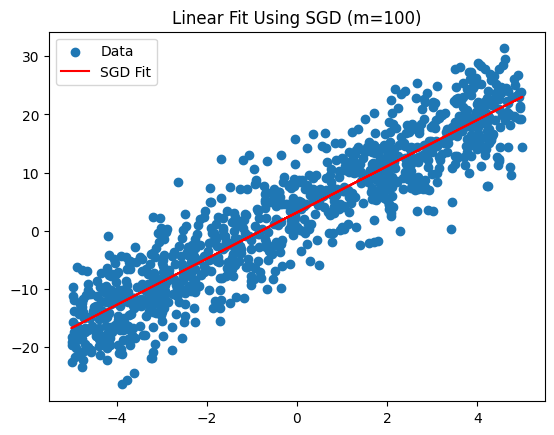

In [ ]:
def Y_based_on_X(x,a,b):
    return a*x + b

#SGD Function with mini batch size m = 100
def stochastic_gradient_descent(X, Y, m=100, epochs=50, learning_rate=0.01):
    a,b= 0, 0
    n= len(X)

    for epoch in range(epochs):
        #Shuffle the data each epoch
        indices = np.random.permutation(n)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        for i in range(0, n, m):
            X_batch = X_shuffled[i:i+m]
            Y_batch = Y_shuffled[i:i+m]

            Y_pred = a * X_batch + b
            error = Y_batch - Y_pred

            da = -2 * np.sum(X_batch * error) / m
            db = -2 * np.sum(error) / m

            a -= learning_rate * da
            b -= learning_rate * db

    return a, b

#Run SGD
a_sgd, b_sgd = stochastic_gradient_descent(X, Y, m=100, epochs=50, learning_rate=0.01)
print(f"SGD Estimates:\na = {a_sgd:.4f}, b = {b_sgd:.4f}")

#Plot result
plt.figure()
plt.scatter(X, Y, label="Data")
plt.plot(X, Y_based_on_X(X, a_sgd, b_sgd), color="red", label="SGD Fit")
plt.legend()
plt.title("Linear Fit Using SGD (m=100)")
plt.show()


In [ ]:
# Closed form SOlution
# Go through this code. This code is just for learning the closed form solution
#This closed-form solution snippet implements Ordinary Least Squares (OLS) linear regression using matrix algebra, also known as the Normal Equation

X_0 = []
for i in range(len(X)):
  X_0.append((1,X[i]))
X = np.matrix(X_0)
Y = np.matrix(Y)
beta = (X.T*X).I*X.T*Y.T

beta

matrix([[3.14307597],
        [3.99849105]])

1**. Impact of varying n on accuracy.**
*  for n=10,there is high variance in estimates of a and b (line may look off)
*  for n=100, it is still noisy but there is a better trend
*  for n=1000, it is close to the true line (4, 3)
*  for n=10000, we observe a smoother line very close to the actual parameters

2**. Implementation of the same using GD.**


*   da is the partial derivative of the loss function (MSE) with respect to a
*   db is the partial derivative with respect to b
*   these are used to iteratively update a and b
*   learning Rate l controls the step size which is small enough to converge, but not so small that it's slow.

**3. Implementation of the same using SGD with m = 100 and n = 1000.**


*   here we update model parameters using small random batches instead of the full dataset.
*   with n = 1000 and batch size m = 100, each epoch has 10 mini-batches.
*  the model adjusts a and b slightly after each batch to reduce prediction error



